<a href="https://colab.research.google.com/github/rezfan13/Rezfan-Atmadja/blob/main/SKO_Rezfan_H_S_Atmadja_1101180208_TT_42_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUBES SKO **  
Nama  : Rezfan H.S  Atmadja

NIM   : 1101180208

Kelas : TT-42-07

In [ ]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

**SKENARIO**

Sebuah Gedung bertingkat di daerah ELtari, Kota Kupang memiliki jumlah lantai mencapai **40 lantai**, jarak gedung dari sentral adalah **12 km**, yang dimana jarak akan dihitung dari **lantai 4** yang dimana jarak yang ditempuh untuk sampai ke Roset adalah **20m**, dengan total jarak adalah **12020 m**, Total ada **6 Connector, 2 Splitter,** dan **8 Splicer.** yang akan dipakai dan Splitter pertama memiliki redaman sebesar **16.00 dB** (Splitter 1:4) dan yang kedua memiliki redaman sebesar **18,20 db** (Splitter 1:8). dan Splicer memiliki redaman sebesar **0,1 dB.**








**PARAMETER**

In [ ]:
#PARAMETER UNTUK DAYA TERIMA
j = np.arange(1.096,12.020,1)
loss_fiber = 0.28 * j
ptrans = 4

#Connector
connector = 6
loss_connector = 0.3 * 6

#Splitter
splitter1 = 16.00
splitter2 = 18.20
loss_splitter = 16.00 + 18.20

#Splicer
splicer = 8
loss_splicer = 0.1 * 8


In [ ]:
#PARAMETER UNTUK SIGNAL TO NOISE RATIO (SNR)
BW = 8*10**9
noise_figure = 1
kboltzman = 1.38*10**-23
tmp = 290
RL = 50 
responsivitas = 0.85
dtsinyal = -0.23
loss_margin = 3
muatan = 1.6*10**-19
arusgelap = 2*10**-7

In [ ]:
#PENGKONVERSIAN
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

**HASIL ANALISIS (FUNGSI & GRAFIK)**

In [ ]:
#FUNGSI DAYA TERIMA
def dayaterima(ptrans,j,loss_fiber,splicer,loss_splicer,connector,loss_connector,loss_splitter,loss_margin):
  RT = loss_fiber + loss_splicer + loss_connector + loss_splitter + loss_margin
  preceive = ptrans - RT
  return preceive
preceive = dayaterima(ptrans,j,loss_fiber,splicer,loss_splicer,connector,loss_connector,loss_splitter,loss_margin)
print ("Daya Terima =",preceive)

Daya Terima = [-36.10688 -36.38688 -36.66688 -36.94688 -37.22688 -37.50688 -37.78688
 -38.06688 -38.34688 -38.62688 -38.90688]


SNR = [29.5245128 28.9645128 28.4045128 27.8445128 27.2845128 26.7245128
 26.1645128 25.6045128 25.0445128 24.4845128 23.9245128]


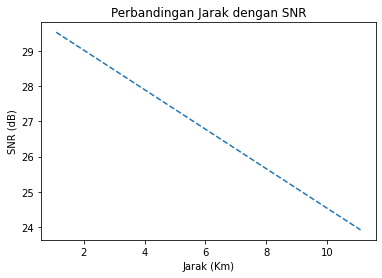

In [ ]:
#FUNGSI SIGNAL NOISE TO RATIO

#Arus primer
def arusprimer(preceive):
  preceive_num = LtN(preceive)
  iprimer = preceive_num * responsivitas
  return iprimer
iprimer = arusprimer(preceive)

#BDC
def bdc(muatan,arusgelap,BW,dtsinyal,noise_figure):
  BDC = 2*muatan*arusgelap*BW*dtsinyal*dtsinyal*noise_figure
  return BDC
BDC = bdc(muatan,arusgelap,BW,dtsinyal,noise_figure)

#Shot Noise
def shotnoise(muatan,arusgelap,BW,dtsinyal,noise_figure):
  sn = 2*muatan*arusgelap*BW*dtsinyal*dtsinyal*noise_figure
  return sn
sn = shotnoise(muatan,arusgelap,BW,dtsinyal,noise_figure)

#Noise Thermal
def noisethermal(kboltzman,tmp,BW,RL):
  nt = (4*kboltzman*tmp*BW)/RL
  return nt
nt = noisethermal(kboltzman,tmp,BW,RL)

#SNR (Signal Noise to Ratio)
def snr(BDC,sn,nt,dtsinyal,iprimer):
  SNR = ((iprimer)**2 * dtsinyal**2)/(BDC + sn + nt)
  signr = NtL(SNR) 
  return signr
signr = snr(BDC,sn,nt,dtsinyal,iprimer)
print("SNR =",signr)

#GRAFIK SIGNAL NOISE TO RATIO (SNR)
def grafik_snr():
  plt.figure()
  plt.plot(j,signr,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

grafik_snr()

Q-Faktor = [29.93819688 28.06891595 26.31634917 24.67320915 23.13266348 21.6883064
 20.33413208 19.06450968 17.87415996 16.75813328 15.71178907]


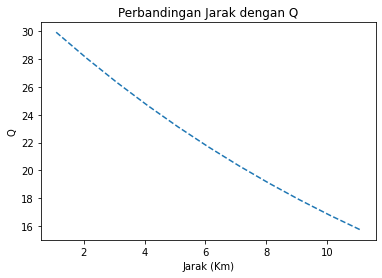

In [ ]:
#FUNGSI Q-FAKTOR
def qfaktor(signr):
  qf = 10**(signr/20)
  return qf
QF = qfaktor(signr)
print("Q-Faktor =",QF)

#GRAFIK Q-FAKTOR
def grafik_Q():
  plt.figure()
  plt.plot(j,QF,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

grafik_Q()

BER = [3.13733524e-197 1.17538863e-173 6.24183274e-153 1.03885754e-134
 1.08849643e-118 1.32554149e-104 3.21596010e-092 2.49642900e-081
 9.40306258e-072 2.47817779e-063 6.30446354e-056]


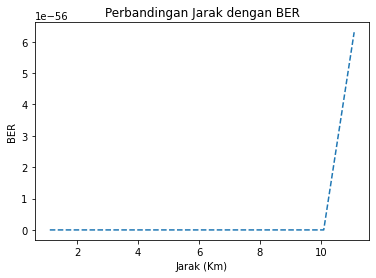

In [ ]:
#FUNGSI BER
def ber(QF):
  phi = 3.14159
  BER = (1/(QF*np.sqrt(2*phi)))*(np.exp(-QF**2/2))
  return BER
BER = ber(QF)
print("BER =",BER)

#GRAFIK BER
def grafik_BER():
  plt.figure()
  plt.plot(j,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_BER()

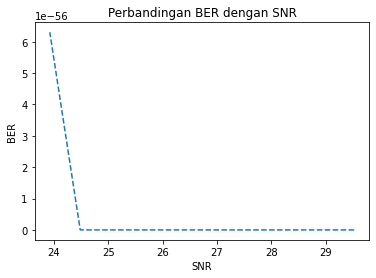

In [ ]:
def grafik_perbandingan():
  plt.figure()
  plt.plot(signr,BER,'--')
  plt.title('Perbandingan BER dengan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()

grafik_perbandingan()